<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression</font></h1>


### Author: Arnold Richards 2024

In [1]:
# Installation of the required libraries
%pip install -U scikit-learn pandas numpy seaborn matplotlib -q

Note: you may need to restart the kernel to use updated packages.


## Importation the required libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Importing the Dataset


Read your chosen dataset into pandas dataframe:


In [3]:
df = pd.read_csv("data/Electric Vehicle Trip Energy Consumption Data.csv")
df.head()


,Trip Energy Consumption,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length
0,0.672,1,6,10.333333,4,121.497948,31.281574,246.000000,2.583348,308.283333,31.000000,30.833333,13
1,0.896,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18
2,1.344,1,7,16.090909,2,121.576968,31.262034,192.000000,2.354560,308.463636,31.272727,30.000000,21
3,1.344,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16
4,0.896,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129


In [4]:
print(len(df))

10151


# 1. About the Data


The information of the dataset was extracted directly from the  Data Explanatory File.  
The data was uploaded by:Yang Liu, liuy@chalmers.se, Chalmers University of Technology.  
The original source can be accesed via the following link:  
*  https://ets-data.sciopen.com/ETSD.2023.9190020

The data consists of normal driving records for dozens of private cars over several months (from June 5, 2015 to June 30, 2016), with a sampling frequency of one minute. The basic specifications of the vehicles are as follows: Roewe E50 is a pure electric vehicle, weighing 1080 kilograms. It is equipped with a 22.4 kWh battery pack, and is reported to have a driving range of 170 kilometers. The raw data has been preprocessed and de-noised, resulting in a final dataset containing 10,000 trips.

| **Field Name**                         | **Description**                                                |
|----------------------------------------|----------------------------------------------------------------|
| **Trip Energy Consumption**            | The energy consumption for each trip (in kWh).                 |
| **Vehicle ID**                         | Unique identifier for the vehicle.                             |
| **Trip Distance**                      | The distance traveled during the trip (in kilometers).         |
| **Time of Day**                        | The departure hour of the trip.                                |
| **Day of the Week**                    | The departure day of the week for the trip.                    |
| **Longitude**                          | The average longitude of the trip.                             |
| **Latitude**                           | The average latitude of the trip.                              |
| **Speed**                              | The average speed of the trip (in km/h).                       |
| **Current**                            | The average current during the trip.                           |
| **Total Voltage**                      | The average total voltage during the trip.                     |
| **Maximum Cell Temperature of Battery**| The mean value of the maximum cell temperature.                |
| **Minimum Cell Temperature of Battery**| The mean value of the minimum cell temperature.                |
| **Trip Time Length**                   | The duration of the trip (in minutes).                         |


# 2. Objectives


In this document i will focus on interpretation of how the different features affect the consumption of the  electric vehicle and how the use of regularization and the incorporation of polynomial features incurr int he results of our models.  
The models used for comparing and predicting are:  
*  Linear Regression
*  Ridge Regression
*  Lasso Regression

# 3.Clensing and feature engenieering


Before starting with the regularization, scaling, etc.  
First i will check if there are any missing values to deal with and since all of our rows are numeric there is not much feature engenieering to do.

In [5]:
# Checking the dataset size
df.shape

(10151, 13)

In [6]:
# Looking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10151 entries, 0 to 10150
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Trip Energy Consumption              10151 non-null  float64
 1   Vehicle ID                           10151 non-null  int64  
 2   Trip Distance                        10151 non-null  int64  
 3   Time of Day                          10151 non-null  float64
 4   Day of the Week                      10151 non-null  int64  
 5   Longitude                            10151 non-null  float64
 6   Latitude                             10151 non-null  float64
 7   Speed                                10151 non-null  float64
 8   Current                              10151 non-null  float64
 9   Total Voltage                        10151 non-null  float64
 10  Maximum Cell Temperature of Battery  10151 non-null  float64
 11  Minimum Cell Temperature of 

Since all of our rows are the size all of the rows have the same number of data as the entries of the dataset i will assume that there are no missing values.

To continue with the data analysis i will check for skwed data so if there is any it will not affect our regressions.
I will do this by ploting the distribution of all my features.

In [7]:
def dist_plotter(df):
    sns.set_theme(style="whitegrid")

    numeric_columns = df.select_dtypes(include='number').columns

    plt.figure(figsize=(15, 50))  

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns), 1, i)
        sns.histplot(df[col], kde=True, bins=30, color='b')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()  
    plt.show()


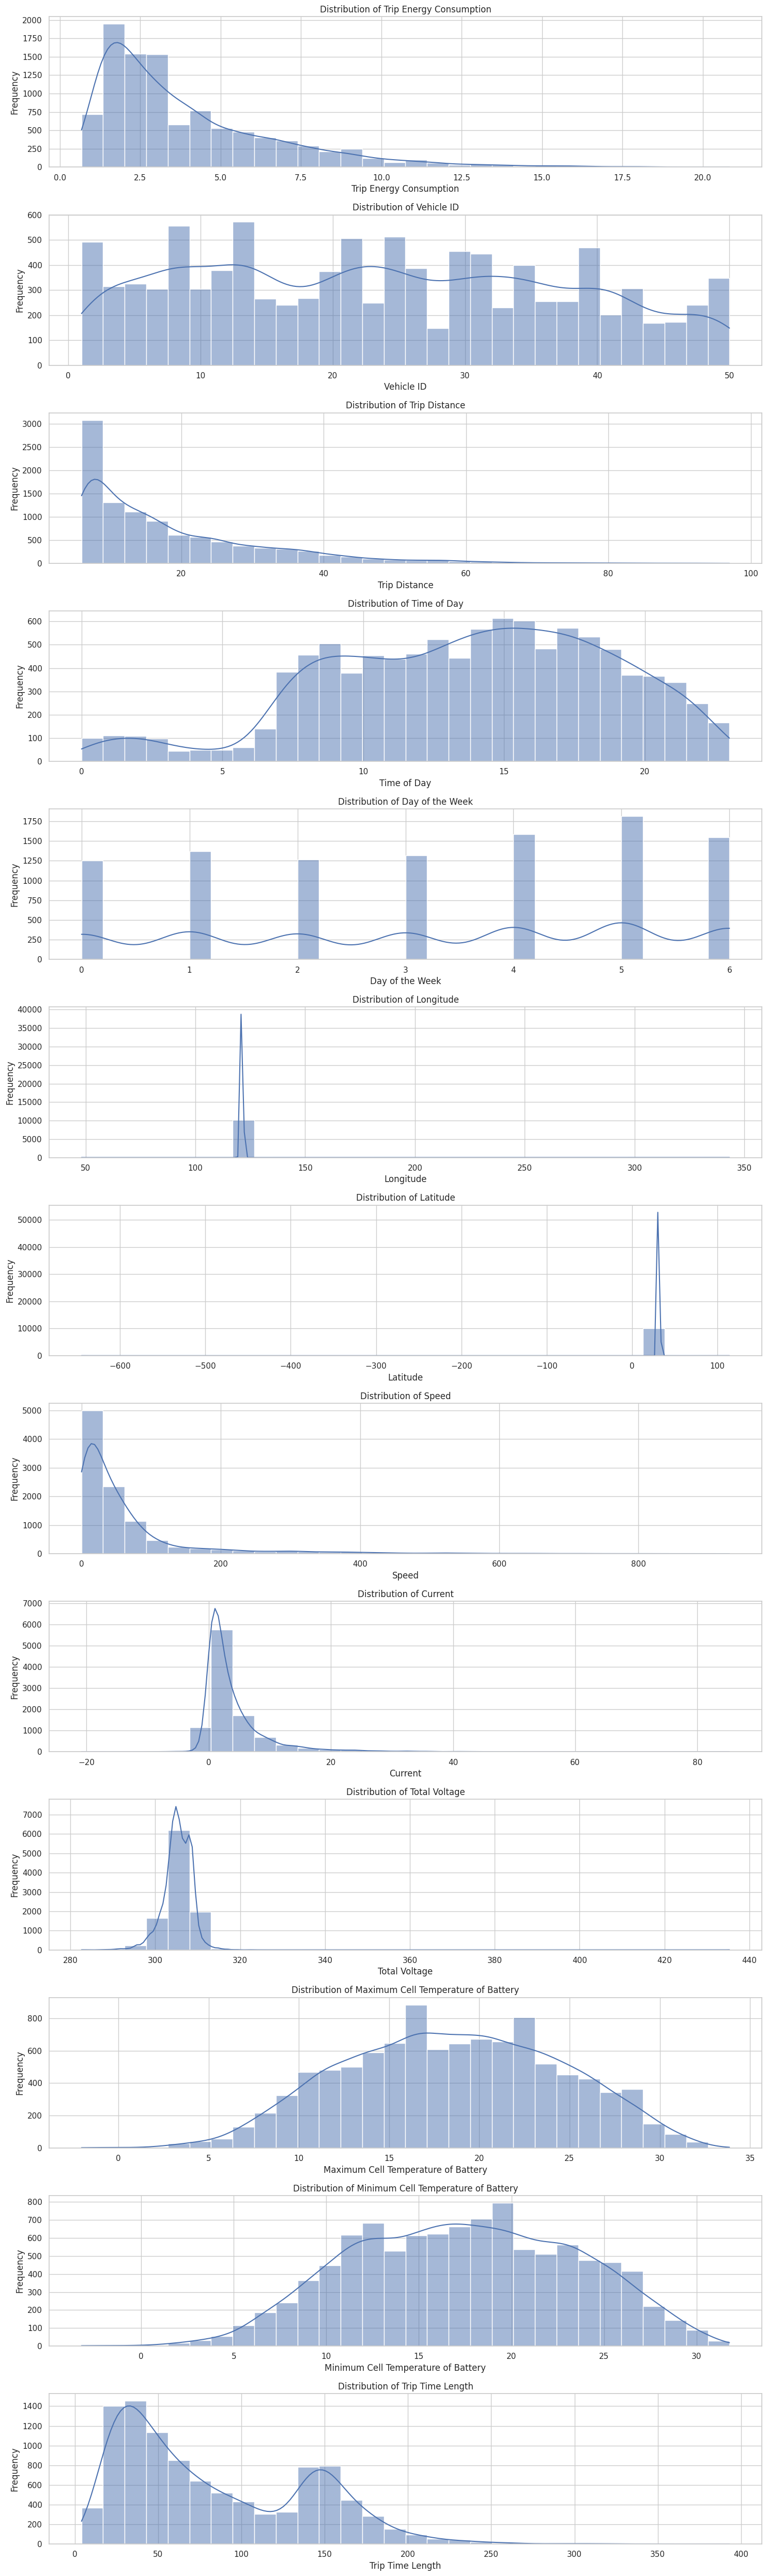

In [8]:
dist_plotter(df)

In [9]:
# skewness test using pandas
skewness_df = df.skew()
print(skewness_df)

Trip Energy Consumption                 1.596845
Vehicle ID                              0.140157
Trip Distance                           1.565317
Time of Day                            -0.412890
Day of the Week                        -0.164790
Longitude                              74.333394
Latitude                              -95.931753
Speed                                   3.464760
Current                                 3.775998
Total Voltage                           4.469712
Maximum Cell Temperature of Battery    -0.049358
Minimum Cell Temperature of Battery    -0.043323
Trip Time Length                        0.726654
dtype: float64


Now i will do a log transformation to any positvely skewed data with skewness higher than .5 excepting the target value which is Trip Energy Consumption and the geographcal values like longitude and latitude.

In [10]:
columns = df.columns
df_copy = df.copy()
for i,column in enumerate(columns):
    if skewness_df[column] > .5 and column != 'Trip Energy Consumption' and column != 'Latitude' and column != 'Longitude':
        if column == 'Current':
            min_value = df_copy[column].min()
            df_copy[column] = df_copy[column] + np.abs(min_value) + 1
        df_copy[column] = np.log1p(df_copy[column])
        
df_copy.skew()

Trip Energy Consumption                 1.596845
Vehicle ID                              0.140157
Trip Distance                           0.378327
Time of Day                            -0.412890
Day of the Week                        -0.164790
Longitude                              74.333394
Latitude                              -95.931753
Speed                                  -0.308489
Current                                 1.561099
Total Voltage                           2.431370
Maximum Cell Temperature of Battery    -0.049358
Minimum Cell Temperature of Battery    -0.043323
Trip Time Length                       -0.260319
dtype: float64

In [11]:
print(min_value)

-20.7999855


Following this since there is no significant negative skewness i will leave the rest of the dataset as is.

# 3. Linear Regression Models

In [12]:
# Importing libraries
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


First of all I will split my Y and X values

In [13]:
df.columns

Index(['Trip Energy Consumption', 'Vehicle ID', 'Trip Distance', 'Time of Day',
       'Day of the Week', 'Longitude', 'Latitude', 'Speed', 'Current',
       'Total Voltage', 'Maximum Cell Temperature of Battery',
       'Minimum Cell Temperature of Battery', 'Trip Time Length'],
      dtype='object')

In [14]:
X = df_copy.drop('Trip Energy Consumption', axis=1)
X = X.drop('Vehicle ID', axis=1)
Y = df_copy['Trip Energy Consumption']

First i will do all of my parameter tuning

In [15]:
# Simple Linear regression
lr = LinearRegression()
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

linear_predictions = cross_val_predict(lr, X, Y, cv=kf)
linear_r2 = r2_score(Y, linear_predictions)
scores = list()
scores.append(linear_r2)
print(scores)

[0.7867760237152711]


In [16]:
# Parameter tuning for linear regression

estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3],
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, Y)
best_poly_degree_linear = grid.best_params_['polynomial_features__degree']

In [17]:
# Alphas generation
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [18]:
# Parameter tuning for Ridge regression
estimator = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': alphas
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, Y)
best_poly_degree_ridge = grid.best_params_['polynomial_features__degree']
best_alpha_ridge = grid.best_params_['ridge_regression__alpha']

In [19]:
# Parameter tuning for Lasso regression
estimator = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso_regression", Lasso(max_iter=100000))])

params = {
    'lasso_regression__alpha': alphas
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, Y)
best_alpha_lasso = grid.best_params_['lasso_regression__alpha']


In [20]:
# Linear regression 
lr = LinearRegression()
pf = PolynomialFeatures(degree=best_poly_degree_linear, include_bias=False)
estimator = Pipeline([
    ("polynomial_features", pf),
    ("linear_regression", lr)])
predictions = cross_val_predict(estimator, X, Y, cv = kf)
estimator.fit(X, Y)
score = r2_score(Y, predictions)
scores.append(score)
lr_coef = estimator.named_steps["linear_regression"].coef_
lr_coef

array([ 4.05644159e+00, -1.57165802e-02,  1.45129043e-02,  7.26770258e-03,
       -2.29217943e-03, -2.01458693e-01,  2.09180979e+00, -1.17906505e+01,
        3.37483789e-01, -3.46805358e-01,  3.21639617e-02])

In [21]:
# Ridge regression 
r = Ridge(alpha=best_alpha_ridge)
pf = PolynomialFeatures(degree=best_poly_degree_ridge, include_bias=False)
estimator = Pipeline([
    ("polynomial_features", pf),
    ("ridge_regression", r)])
predictions = cross_val_predict(estimator, X, Y, cv = kf)
estimator.fit(X, Y)
score = r2_score(Y, predictions)
scores.append(score)
r_coef = estimator.named_steps["ridge_regression"].coef_

In [22]:
# Lasso regression 
ls = Lasso(alpha=best_alpha_lasso)
pf = PolynomialFeatures(degree=best_poly_degree_ridge, include_bias=False)
estimator = Pipeline([
    ("polynomial_features", pf),
    ("lasso_regression", ls)])
predictions = cross_val_predict(estimator, X, Y, cv = kf)
estimator.fit(X, Y)
score = r2_score(Y, predictions)
scores.append(score)
lasso_coef = estimator.named_steps['lasso_regression'].coef_

# 4. Insights and key findings


After tuning and performing all the regressions we can analyze the data obtained.

Here we can see the r2 score of each regression:  
*  Linear Regression
*  Linear Regression with Poly Features and parameter tuning
*  Ridge Regression scaled with Poly Features and parameter tuning
*  Lasso Regression scaled with Poly Features and parameter tuning

In [23]:
for score in scores:
    print(str(score)+"\n")

0.7867760237152711

0.7867760237152704

0.7860773043526792

0.7858207361129551



As we can see in this particular case the the r2 score is best with simple regression.  
So a simpler model is the best fit for my particular dataset.

Following the model analysis i am going to show the coeficients of the models for the highest weights.
That way showing what features have the most impact in the models prediction.

In [24]:

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_coef
})
coef_df


,Feature,Coefficient
0,Trip Distance,4.056442
1,Time of Day,-0.015717
2,Day of the Week,0.014513
3,Longitude,0.007268
4,Latitude,-0.002292
5,Speed,-0.201459
6,Current,2.091810
7,Total Voltage,-11.790651
8,Maximum Cell Temperature of Battery,0.337484
9,Minimum Cell Temperature of Battery,-0.346805


In [25]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': r_coef
})
coef_df

,Feature,Coefficient
0,Trip Distance,4.055508
1,Time of Day,-0.015355
2,Day of the Week,0.015272
3,Longitude,0.007004
4,Latitude,-0.002423
5,Speed,-0.202421
6,Current,2.177174
7,Total Voltage,-6.359785
8,Maximum Cell Temperature of Battery,0.341925
9,Minimum Cell Temperature of Battery,-0.352944


In [26]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coef
})
coef_df

,Feature,Coefficient
0,Trip Distance,4.056152
1,Time of Day,-0.015180
2,Day of the Week,0.015445
3,Longitude,0.006664
4,Latitude,-0.002475
5,Speed,-0.200319
6,Current,2.187824
7,Total Voltage,-3.252042
8,Maximum Cell Temperature of Battery,0.341377
9,Minimum Cell Temperature of Battery,-0.353431


Seeing there is no apreciable difference between cofeicients in the models we can determine that the primary factors in energy consumption are:

1. Trip Distance
2. Current 
3. Total Voltage

So for example if we wanted to optimize the consumtion of the vehicle this are the areas were we should focus.

# 5. Next Steps


After the analysis the next steps would be to utilize the model predictions for consumption analysis and to use the learned information to optimize the vehicle consumption or utilize the information in new vehicles.

# 6. References

Yang Liu. Electric Vehicle Trip Energy Consumption Data. ETS-Data, 2023. https://doi.org/10.26599/ETSD.2023.9190020
Yang Liu. Electric Vehicle Trip Energy Consumption Data. ETS-Data, 2023. https://cstr.cn/32009.11.ETSD.2023.9190020

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
